## Comparing NYC Arrest Data to NYC Income Data

In [2]:
import pandas as pd
import numpy as np

##Visualization Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Income DataFrame

data_dir= '/Users/pdpat/Documents/CS301 Folder/NYC_Income.csv'
df = pd.read_csv(data_dir)
df= df.drop(columns=['Unnamed: 2','Unnamed: 4','Unnamed: 6','Unnamed: 8','Unnamed: 10'])
df= df.drop(df.index[[0,1,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]])
df= df.transpose()
df.columns = df.iloc[0]
df= df.drop(df.index[0])
header= ['Total households', 'Household income of less than $10,000','10,000 to 14,999','15,000 to 24,999','25,000 to 34,999','35,000 to 49,999','50,000 to 74,999','75,000 to 99,999','100,000 to 149,999','150,000 to 199,999','$200,000 or more','Median household income (dollars)','Mean household income (dollars)']
df.columns= header
df

,Total households,"Household income of less than $10,000","10,000 to 14,999","15,000 to 24,999","25,000 to 34,999","35,000 to 49,999","50,000 to 74,999","75,000 to 99,999","100,000 to 149,999","150,000 to 199,999","$200,000 or more",Median household income (dollars),Mean household income (dollars)
Brooklyn,"950,856","88,547","65,443","95,330","81,986","105,546","138,339","104,354","129,218","62,876","79,217","56,015","85,910"
Bronx,"499,728","67,371","49,272","65,984","52,700","64,403","77,306","47,045","45,809","16,847","12,991","38,085","56,328"
Manhattan,"758,133","62,522","42,637","57,335","46,134","57,126","89,879","71,877","106,351","62,992","161,280","82,459","152,002"
Queens,"779,234","45,630","33,236","67,706","67,074","90,643","134,092","101,438","127,283","61,120","51,012","64,987","85,330"
Staten Island,"166,152","13,395","6,336","11,416","10,704","14,540","22,758","20,844","31,501","18,179","16,479","79,267","98,841"


In [4]:
#Arrest DataFrame

data_dir2= '/Users/pdpat/Documents/CS301 Folder/NYPD_Arrests_Data__Historic_.csv'
df2 = pd.read_csv(data_dir2)
df2 = df2.drop(columns=['ARREST_KEY','X_COORD_CD', 'Latitude', 'Longitude','Y_COORD_CD', 'OFNS_DESC','PD_CD', 'KY_CD', 'LAW_CODE', 'LAW_CAT_CD', 'JURISDICTION_CODE', 'ARREST_PRECINCT','AGE_GROUP','PERP_RACE','PERP_SEX'])
df2.loc[(df2['ARREST_BORO']=='S'), 'ARREST_BORO'] = 'Staten Island'
df2.loc[(df2['ARREST_BORO']=='Q'), 'ARREST_BORO'] = 'Queens'
df2.loc[(df2['ARREST_BORO']=='M'), 'ARREST_BORO'] = 'Manhattan'
df2.loc[(df2['ARREST_BORO']=='B'), 'ARREST_BORO'] = 'Bronx'
df2.loc[(df2['ARREST_BORO']=='K'), 'ARREST_BORO'] = 'Brooklyn'

df2

,ARREST_DATE,PD_DESC,ARREST_BORO
0,12/31/2017,"MARIJUANA, POSSESSION",Queens
1,12/31/2017,"THEFT OF SERVICES, UNCLASSIFIED",Queens
2,12/31/2017,"NY STATE LAWS,UNCLASSIFIED VIOLATION",Brooklyn
3,12/31/2017,ASSAULT 3,Manhattan
4,12/31/2017,ASSAULT 3,Manhattan
...,...,...,...
4798334,01/01/2018,AGGRAVATED HARASSMENT 2,Bronx
4798335,01/01/2018,"ASSAULT 2,1,UNCLASSIFIED",Bronx
4798336,01/01/2018,"ROBBERY,UNCLASSIFIED,OPEN AREAS",Manhattan
4798337,01/01/2018,"TRAFFIC,UNCLASSIFIED MISDEMEAN",Manhattan


In [5]:
#Combining Arrest and Income Data Frames by showing the number of arrests per borough and comparing to the average household incomes

df2['Mean Household Income']=''
df2['Median Household Income']=''

df2.loc[(df2['ARREST_BORO']=='Brooklyn'), 'Mean Household Income'] = 85910
df2.loc[(df2['ARREST_BORO']=='Brooklyn'), 'Median Household Income'] = 56015

df2.loc[(df2['ARREST_BORO']=='Bronx'), 'Mean Household Income'] = 56328
df2.loc[(df2['ARREST_BORO']=='Bronx'), 'Median Household Income'] = 38085

df2.loc[(df2['ARREST_BORO']=='Manhattan'), 'Mean Household Income'] = 152002
df2.loc[(df2['ARREST_BORO']=='Manhattan'), 'Median Household Income'] = 82459

df2.loc[(df2['ARREST_BORO']=='Queens'), 'Mean Household Income'] = 85330
df2.loc[(df2['ARREST_BORO']=='Queens'), 'Median Household Income'] = 64987

df2.loc[(df2['ARREST_BORO']=='Staten Island'), 'Mean Household Income'] = 98841
df2.loc[(df2['ARREST_BORO']=='Staten Island'), 'Median Household Income'] = 79267

df2   

,ARREST_DATE,PD_DESC,ARREST_BORO,Mean Household Income,Median Household Income
0,12/31/2017,"MARIJUANA, POSSESSION",Queens,85330,64987
1,12/31/2017,"THEFT OF SERVICES, UNCLASSIFIED",Queens,85330,64987
2,12/31/2017,"NY STATE LAWS,UNCLASSIFIED VIOLATION",Brooklyn,85910,56015
3,12/31/2017,ASSAULT 3,Manhattan,152002,82459
4,12/31/2017,ASSAULT 3,Manhattan,152002,82459
...,...,...,...,...,...
4798334,01/01/2018,AGGRAVATED HARASSMENT 2,Bronx,56328,38085
4798335,01/01/2018,"ASSAULT 2,1,UNCLASSIFIED",Bronx,56328,38085
4798336,01/01/2018,"ROBBERY,UNCLASSIFIED,OPEN AREAS",Manhattan,152002,82459
4798337,01/01/2018,"TRAFFIC,UNCLASSIFIED MISDEMEAN",Manhattan,152002,82459


In [6]:
#Checking for Missing Data

def  get_percent_nans(df, column_name):
    colSize = df.shape[0]
    empty = df.loc[df[column_name].isna()]
    emptySize = empty.shape[0]
    return (emptySize/colSize) * 100

for col in df2.columns:
    print('The \"{}\" column has {:.2f}% empty values'.format(col, get_percent_nans(df2, col)))


The "ARREST_DATE" column has 0.00% empty values
The "PD_DESC" column has 0.18% empty values
The "ARREST_BORO" column has 0.00% empty values
The "Mean Household Income" column has 0.00% empty values
The "Median Household Income" column has 0.00% empty values


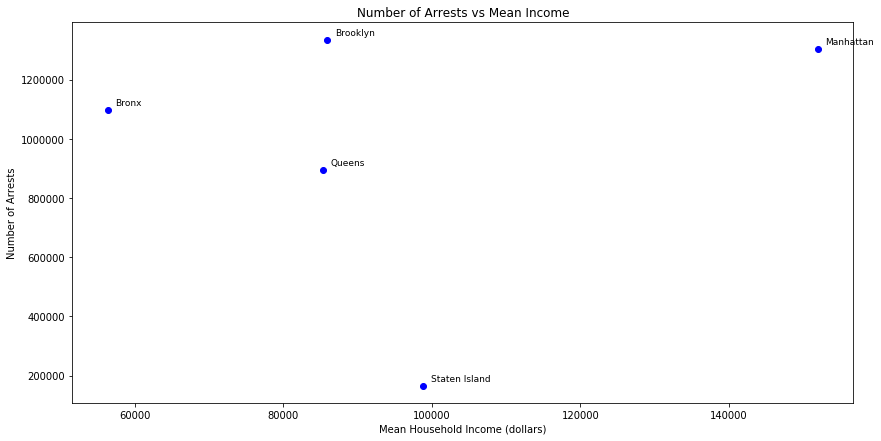

In [7]:
numbrooklyn= len(df2.loc[(df2['ARREST_BORO']=='Brooklyn')])
numbronx= len(df2.loc[(df2['ARREST_BORO']=='Bronx')])
nummanhat= len(df2.loc[(df2['ARREST_BORO']=='Manhattan')])
numqueens= len(df2.loc[(df2['ARREST_BORO']=='Queens')])
numstaten= len(df2.loc[(df2['ARREST_BORO']=='Staten Island')])

x_coords= [85910, 56328, 152002, 85330, 98841]
y_coords= [numbrooklyn, numbronx, nummanhat, numqueens, numstaten]
types= ['Brooklyn','Bronx','Manhattan','Queens','Staten Island']

plt.figure(figsize= (14,7))
plt.title('Number of Arrests vs Mean Income')
plt.xlabel('Mean Household Income (dollars)')
plt.ylabel('Number of Arrests')

for i, type in enumerate(types):
    x= x_coords[i]
    y= y_coords[i]
    plt.plot(x,y,'o', color='b')
    plt.text(x+1000,y+15000,type,fontsize=9)

plt.show()
